# **Business Problem Understanding**
- **The Titanic dataset is used to build a machine learning model that can predict whether a passenger survived or not based on various features such as age, gender, ticket class, and more**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv(r"C:\Users\yukti\Data science by SRK\ML\Supervied\Classification\Titanic\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


**Data Exploration**

In [73]:
df.shape

(891, 12)

In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [83]:
df['Survived'].nunique()

2

In [85]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [87]:
df['Pclass'].nunique()

3

In [89]:
for col in df.columns.tolist():
    print(col, ':')
    print(df[col].unique())
    print()

PassengerId :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [91]:
continous=['Age','Fare']
discrete_categorical=['Sex','Embarked']
discrete_count=['Survived','Pclass','SibSp','Parch']
time_series=[]

**Descriptive Statistics**

In [94]:
df[continous].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [96]:
df[discrete_categorical].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [98]:
df[continous].skew()

Age     0.389108
Fare    4.787317
dtype: float64

In [100]:
df[continous].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [106]:
df.duplicated().sum()

0

**Plots**

In [109]:
j=1
plt.figure(figsize=(25,30),dpi=500)
for i in continous:
    plt.subplot(2,2,j)
    sns.histplot(df[i],kde=True)
    plt.title(f'{i}')
    j=j+1
plt.show()    

In [110]:
j=1
plt.figure(figsize=(25,30),dpi=500)
for i in continous:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(f'{i}')
    j=j+1
plt.show()

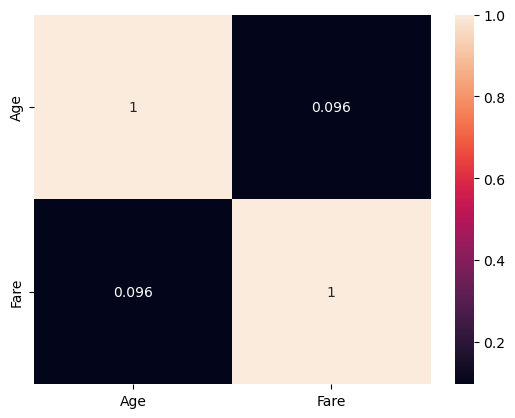

In [111]:
#plt.figure(figsize(10,7))
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

**Data Preprocessing**

**Feature Engineering**

In [117]:
df['Deck']=df['Cabin'].str[0]

In [119]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')

In [121]:
df['Family']=df['SibSp']+df['Parch']

In [123]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,Rev,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr,0


**1. Data Cleaning**

**Treating Wrong Data**

In [127]:
#No wrong data is there

**Missing Values**

In [146]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Deck']=df['Deck'].fillna(df['Deck'].mode()[0])

In [148]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
Title            0
Family           0
dtype: int64

**Wrong Data Type**

In [151]:
# no wrong data type is theri

**Duplicates**

In [154]:
df.drop_duplicates(inplace=True)

In [156]:
df.duplicated().sum()

0

**Outliers**

In [159]:
# No need to fill the outliers. 

**Dimension Reduction**

In [162]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','SibSp','Parch'],inplace=True)

In [170]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Family
0,0,3,male,22.0,7.2500,S,C,Mr,1
1,1,1,female,38.0,71.2833,C,C,Mrs,1
2,1,3,female,26.0,7.9250,S,C,Miss,0
3,1,1,female,35.0,53.1000,S,C,Mrs,1
4,0,3,male,35.0,8.0500,S,C,Mr,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,C,Rev,0
887,1,1,female,19.0,30.0000,S,B,Miss,0
888,0,3,female,28.0,23.4500,S,C,Miss,3
889,1,1,male,26.0,30.0000,C,C,Mr,0


**2. Data Wrangling**

- **Data Transformation**

In [174]:
df[continous].skew()

Age     0.510245
Fare    4.787317
dtype: float64

In [176]:
# n=1
# while True:
#     df['Fare']=df['Fare']**(1/n)
#     s=df['Fare'].skew()
#     if s<=1:
#         break
#     n=n+1

# print(n)

In [178]:
from scipy.stats import yeojohnson
df['Fare'],param=yeojohnson(df['Fare'])

In [180]:
df[continous].skew()

Age     0.510245
Fare   -0.040329
dtype: float64

**Encoding**

In [183]:
# df['Sex']=df['Sex'].replace({'male':1,'female':0})
# df['Embarked']=df['Embarked'].replace({'S':0, 'C':1, 'Q':2})
# if it is ordinal data then do this type of encoding

In [185]:
df=pd.get_dummies(df, drop_first=True,dtype=int)

In [187]:
df

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,3,22.0,1.906724,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,3.497640,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,1.970459,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,3.304258,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,1.981680,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,2.326029,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
887,1,1,19.0,2.916885,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
888,0,3,28.0,2.745246,3,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
889,1,1,26.0,2.916885,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [189]:
df.to_csv('cleaned_Titanic.csv',index=False)